# Caso 2: Aplicación de PCA a un conjunto de datos de vinos

## Introducción

Este *Jupyter notebook* demuestra la aplicación de PCA en un *wine dataset*, que contiene los resultados de un análisis químico de vinos cultivados en la misma región en Italia pero derivados de tres diferentes cultivares. El análisis tiene como objetivo reducir la dimensionalidad del conjunto de datos e identificar patrones que diferencian los tipos de vino basados en sus propiedades químicas.


## Descripción del *dataset*

El conjunto de datos del vino es un conjunto público del Repositorio de Aprendizaje Automático de UCI. Incluye 178 muestras con 13 propiedades químicas cada una, tales como contenido de alcohol, intensidad del color, tono, y varias propiedades químicas asociadas con el vino. Hay tres tipos de vino en el conjunto de datos, correspondientes a tres diferentes cultivares.



## Fundamentos Matemáticos del Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos, al tiempo que conserva la mayor cantidad posible de su variabilidad. Esto se logra identificando las direcciones, llamadas componentes principales, a lo largo de las cuales la variabilidad de los datos es máxima.

### Covarianza y Componentes Principales

Primero, consideremos un conjunto de datos $\mathbf{X}$ de dimensiones $n \times p$, donde $n$ es el número de muestras y $p$ es el número de variables. El primer paso en PCA es centrar los datos restando la media de cada variable. Esto se realiza para asegurar que el PCA atraviese el origen de las coordenadas del espacio de las características.

La matriz de covarianza $\mathbf{S}$ de los datos centrados se calcula como:

$$
\mathbf{S} = \frac{1}{n-1} \mathbf{X}^T \mathbf{X}
$$

Esta matriz de covarianza es una matriz cuadrada $p \times p$ donde cada elemento representa la covarianza entre dos variables. PCA busca transformar las variables originales en un nuevo conjunto de variables que sean linealmente independientes unas de otras. Estas nuevas variables se llaman componentes principales.

### Autovalores y autovectores

Los componentes principales se obtienen encontrando los autovectores de la matriz de covarianza $\mathbf{S}$. Los autovectores de $\mathbf{S}$ son direcciones en el espacio de datos donde la variabilidad de los datos es máxima. Estos se calculan resolviendo la ecuación característica:

$$
\mathbf{S} \mathbf{v} = \lambda \mathbf{v}
$$

donde $\lambda$ representa un autovalor y $\mathbf{v}$ es un autovector asociado. Los autovalores indican la cantidad de varianza capturada por sus respectivos autovectores. Ordenando los autovectores en función de sus autovalores descendentes, podemos seleccionar los $k$ primeros para formar un subespacio de características.

### Transformación de Datos

Una vez seleccionados los autovectores, los datos originales $\mathbf{X}$ pueden ser transformados proyectándolos sobre los autovectores. Esto se realiza mediante la multiplicación de $\mathbf{X}$ por una matriz $\mathbf{P}$ formada por los $k$ autovectores seleccionados:

$$
\mathbf{Y} = \mathbf{X} \mathbf{P}
$$

Donde $\mathbf{Y}$ representa la matriz de datos transformada con dimensiones reducidas. Los componentes de $\mathbf{Y}$ son las nuevas características derivadas a partir de los datos originales que ahora reflejan la mayor parte de la variabilidad en menos dimensiones.

Este proceso no solo ayuda a reducir la cantidad de recursos necesarios para almacenar y procesar los datos, sino que también mejora la visualización de datos complejos y facilita la identificación de patrones o estructuras subyacentes en los datos.



## Preparación de datos

In [53]:
# Load the data
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows
import pandas as pd
df = pd.DataFrame(X_scaled, columns=data.feature_names)
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## Aplicación del PCA

In [48]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.36198848, 0.1920749 , 0.11123631])

Los tres primeros componentes principales, explican el 66% de la variablidad.

## Visualización de resultados

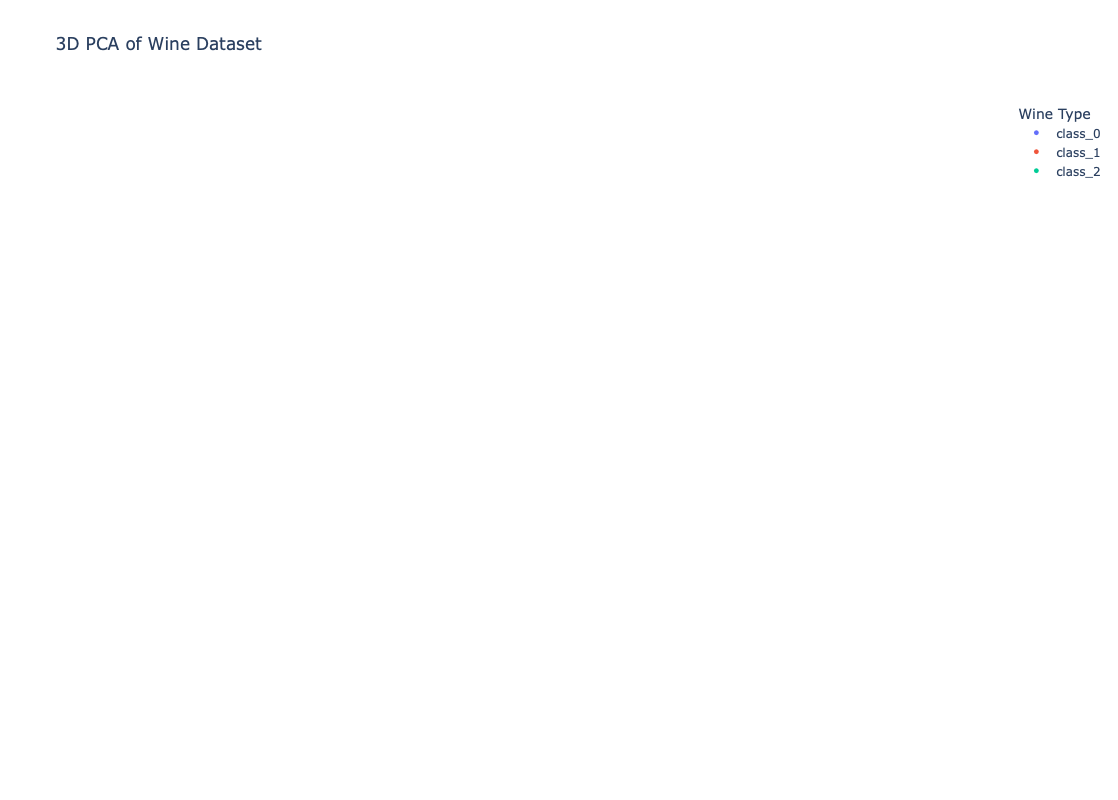

In [51]:
# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Wine Type'] = [wine.target_names[i] for i in y]

# Plotting the 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Wine Type',
                     title='3D PCA of Wine Dataset',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                     hover_data={'Wine Type': True})
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=1000, height=800)  # Increased dimensions
fig.show()


## Interpretación de los Resultados

El diagrama de dispersión de los tres primeros componentes principales revela cómo el PCA ha logrado capturar la varianza y agrupar los vinos basado en sus composiciones químicas. Los diferentes tipos de vino son claramente separables hasta cierto punto, lo que sugiere que estos componentes capturan diferencias clave entre ellos.


## Conclusión

Este análisis de PCA del conjunto de datos del vino ha reducido exitosamente la dimensionalidad de 13 propiedades químicas a solo 2 componentes principales, capturando una varianza significativa y revelando agrupaciones que corresponden bien con los tipos de vino. Este método resulta efectivo para el análisis exploratorio de datos y ayuda a entender relaciones complejas en los datos.
